### After Exploratory Data Analysis that has been done in previous chapter, the Data Preprocessing flow is:
1. Imputing Missing Values as planned before.
2. Logarithmic Scale the data as a treatment for Outliers.
3. MinMaxScaler to scale the dataset equally from 0 to 1.
4. Apply clustering method by using DBSCAN, because the PCA-transformed data are clustered neatly.

In [35]:
# common modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# preprocessing, clustering, PCA
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

In [26]:
data = pd.read_csv('CC GENERAL.csv', index_col = 'CUST_ID') # Set the customer's ID as index
print(data.shape)
data.head()

(8950, 17)


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                
C10001     40.900749           0.818182      95.40              0.00   
C10002   3202.467416           0.909091       0.00              0.00   
C10003   2495.148862           1.000000     773.17            773.17   
C10004   1666.670542           0.636364    1499.00           1499.00   
C10005    817.714335           1.000000      16.00             16.00   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C10001                     95.4      0.000000             0.166667   
C10002                      0.0   6442.945483             0.000000   
C10003                      0.0      0.000000             1.000000   
C10004                      0.0    205.788017             0.083333   
C10005                      0.0      0.000000             0.083333   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
C10001                     0.000000                          0.083333   
C10002                     0.000000                          0.000000   
C10003                     1.000000                          0.000000   
C10004                     0.083333                          0.000000   
C10005                     0.083333                          0.000000   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
C10001                 0.000000                 0              2   
C10002                 0.250000                 4              0   
C10003                 0.000000                 0             12   
C10004                 0.083333                 1              1   
C10005                 0.000000                 0              1   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
CUST_ID                                                                         
C10001         1000.0   201.802084        139.509787          0.000000      12  
C10002         7000.0  4103.032597       1072.340217          0.222222      12  
C10003         7500.0   622.066742        627.284787          0.000000      12  
C10004         7500.0     0.000000               NaN          0.000000      12  
C10005         1200.0   678.334763        244.791237          0.000000      12

### 1. Imputing Missing Values

In [27]:
def imputeMissingValues(df):
    # Missing Values of CREDIT_LIMIT
    df.dropna(subset = ['CREDIT_LIMIT'], inplace = True)
    
    # Missing Values of MINIMUM_PAYMENTS
    minpay = df['MINIMUM_PAYMENTS'].copy() # make a copy of MINIMUM_PAYMENTS
    payments_mean = np.mean(df['PAYMENTS']) # take the mean value of PAYMENTS

    i = 0
    for payments, minpayments in zip(df['PAYMENTS'], df['MINIMUM_PAYMENTS'].isna()):
        if (payments == 0) and (minpayments == True):
            minpay[i] = 0
        elif (0 < payments < payments_mean) and (minpayments == True): 
            minpay[i] = payments
        elif minpayments == True: # sisanya diisi oleh mean
            minpay[i] = payments_mean
        i += 1

    df['MINIMUM_PAYMENTS'] = minpay.copy()
    return df

In [28]:
cleaned_data = imputeMissingValues(data)

In [29]:
cleaned_data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### 2. Logarithmic Scale the data as a treatment for Outliers.

In [30]:
logscaled_data = np.log2(cleaned_data + 0.01)
logscaled_data.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                              
C10001    5.354408          -0.271980   6.576069         -6.643856   
C10002   11.644973          -0.121720  -6.643856         -6.643856   
C10003   11.284916           0.014355   9.594661          9.594661   
C10004   10.702762          -0.629581  10.549794         10.549794   
C10005    9.675471           0.014355   4.000901          4.000901   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C10001                 6.576069     -6.643856            -2.500896   
C10002                -6.643856     12.653507            -6.643856   
C10003                -6.643856     -6.643856             0.014355   
C10004                -6.643856      7.685085            -3.421469   
C10005                -6.643856     -6.643856            -3.421469   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
C10001                    -6.643856                         -3.421469   
C10002                    -6.643856                         -6.643856   
C10003                     0.014355                         -6.643856   
C10004                    -3.421469                         -6.643856   
C10005                    -3.421469                         -6.643856   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
C10001                -6.643856         -6.643856       1.007196   
C10002                -1.943416          2.003602      -6.643856   
C10003                -6.643856         -6.643856       3.586164   
C10004                -3.421469          0.014355       0.014355   
C10005                -6.643856         -6.643856       0.014355   

         CREDIT_LIMIT   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
CUST_ID                                                                         
C10001       9.965799   7.656869          7.124326         -6.643856  3.586164  
C10002      12.773141  12.002478         10.066560         -2.106423  3.586164  
C10003      12.872677   9.280949          9.293000         -6.643856  3.586164  
C10004      12.872677  -6.643856         -6.643856         -6.643856  3.586164  
C10005      10.228831   9.405875          7.935467         -6.643856  3.586164

### 3. MinMaxScaler the dataset

In [34]:
minMaxScaler = MinMaxScaler().fit_transform(logscaled_data)

### 4. PCA + DBSCAN Clustering 

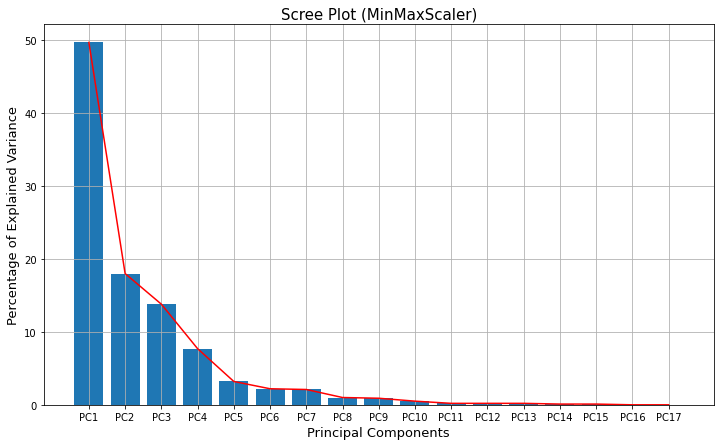

81.5% variance of the dataset lies on the first 3 Principal Components


In [42]:
# PCA

pca = PCA(n_components = 17)
pca.fit(minMaxScaler)
pca_data = pca.transform(minMaxScaler)

top3_pc = pca_data[:,:3] # Take the first 3 Principal Components (PC1, PC2, and PC3)

def scree_plot(pca, scaler):
    per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
    labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

    plt.figure(figsize = (12,7))
    plt.bar(x = range(1,len(per_var)+1), height = per_var, tick_label = labels)
    plt.plot(range(1,len(per_var)+1), per_var, c = 'red')
    plt.ylabel('Percentage of Explained Variance', size = 13)
    plt.xlabel('Principal Components', size = 13)
    plt.title('Scree Plot (%s)' %(scaler), size = 15)
    plt.grid()
    plt.show()
    print('%s%% variance of the dataset lies on the first 3 Principal Components'  %(np.sum(per_var[:3])))

scree_plot(pca, 'MinMaxScaler')

In [41]:
# DBSCAN

dbscan = DBSCAN(eps=0.2)
dbscan.fit(top3_pc)
dbscan_labels = dbscan.labels_

In [52]:
x, y, z = top3_pc.T

fig = px.scatter_3d(x = x, 
                    y = y, 
                    z = z,
                    color = dbscan_labels)
fig.show()

<img src = "./images/dbscan.png"> 

#### Looking at the quantity of each Cluster

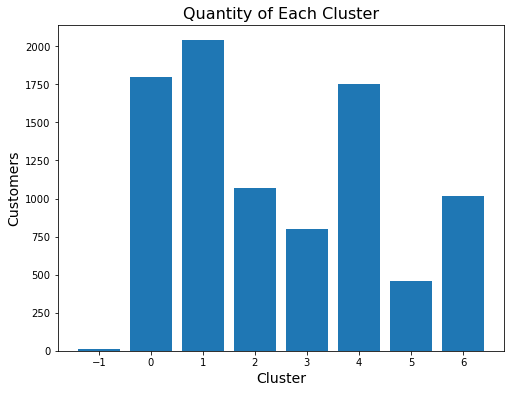

Cluster -1: 12
Cluster 0: 1800
Cluster 1: 2040
Cluster 2: 1068
Cluster 3: 800
Cluster 4: 1754
Cluster 5: 459
Cluster 6: 1016


In [47]:
labels, counts = np.unique(dbscan_labels, return_counts = True)

plt.figure(figsize = (8,6))
plt.title('Quantity of Each Cluster', size = 16)
plt.bar(labels, counts)
plt.xlabel('Cluster', size = 14)
plt.ylabel('Customers', size = 14)
plt.xticks(labels)
plt.show()

for i in zip(labels, counts):
    print('Cluster %s: %s' %(i[0],i[1]))

It's shown that there are 12 Customers which are considered as Anomaly (-1), that can be deleted considering that there are only 12 customers.
<br>

Those customers are considered as Anomaly, because their data don't behave differently with other cluster, which make them act as a **bridge which lay between clusters**

<img src = "./images/dbscan_anomaly.png">

### Label the dataset by each cluster (Customer Segementation) 

In [57]:
cleaned_data.shape

(8949, 17)

In [56]:
final_data = cleaned_data.copy()
final_data['Label'] = dbscan_labels
final_data.drop(final_data[final_data['Label'] == -1].index, inplace = True) # Drop the 12 Anomaly Customers
final_data

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                
C10001     40.900749           0.818182      95.40              0.00   
C10002   3202.467416           0.909091       0.00              0.00   
C10003   2495.148862           1.000000     773.17            773.17   
C10004   1666.670542           0.636364    1499.00           1499.00   
C10005    817.714335           1.000000      16.00             16.00   
...              ...                ...        ...               ...   
C19186     28.493517           1.000000     291.12              0.00   
C19187     19.183215           1.000000     300.00              0.00   
C19188     23.398673           0.833333     144.40              0.00   
C19189     13.457564           0.833333       0.00              0.00   
C19190    372.708075           0.666667    1093.25           1093.25   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C10001                    95.40      0.000000             0.166667   
C10002                     0.00   6442.945483             0.000000   
C10003                     0.00      0.000000             1.000000   
C10004                     0.00    205.788017             0.083333   
C10005                     0.00      0.000000             0.083333   
...                         ...           ...                  ...   
C19186                   291.12      0.000000             1.000000   
C19187                   300.00      0.000000             1.000000   
C19188                   144.40      0.000000             0.833333   
C19189                     0.00     36.558778             0.000000   
C19190                     0.00    127.040008             0.666667   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
C10001                     0.000000                          0.083333   
C10002                     0.000000                          0.000000   
C10003                     1.000000                          0.000000   
C10004                     0.083333                          0.000000   
C10005                     0.083333                          0.000000   
...                             ...                               ...   
C19186                     0.000000                          0.833333   
C19187                     0.000000                          0.833333   
C19188                     0.000000                          0.666667   
C19189                     0.000000                          0.000000   
C19190                     0.666667                          0.000000   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
C10001                 0.000000                 0              2   
C10002                 0.250000                 4              0   
C10003                 0.000000                 0             12   
C10004                 0.083333                 1              1   
C10005                 0.000000                 0              1   
...                         ...               ...            ...   
C19186                 0.000000                 0              6   
C19187                 0.000000                 0              6   
C19188                 0.000000                 0              5   
C19189                 0.166667                 2              0   
C19190                 0.333333                 2             23   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
CUST_ID                                                                  
C10001         1000.0   201.802084        139.509787          0.000000   
C10002         7000.0  4103.032597       1072.340217          0.222222   
C10003         7500.0   622.066742

### Take a glance of Descriptive Statistics for each cluster

In [60]:
for i in range(7):
    print('Cluster:', i)
    display(final_data[final_data['Label'] == i].describe())
    print('\n')

Cluster: 0


BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   1800.000000        1800.000000   1800.000000            1800.0   
mean     399.097003           0.788155    537.509883               0.0   
std      917.224800           0.299982    887.469328               0.0   
min        0.000000           0.000000      0.000000               0.0   
25%       18.292113           0.636364    154.965000               0.0   
50%       56.153365           1.000000    321.360000               0.0   
75%      288.875684           1.000000    601.897500               0.0   
max    11670.179850           1.000000  22500.000000               0.0   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             1800.000000        1800.0          1800.000000   
mean               538.518811           0.0             0.705799   
std                889.463488           0.0             0.306385   
min                  0.000000           0.0             0.083333   
25%                154.965000           0.0             0.416667   
50%                322.145000           0.0             0.833333   
75%                604.620000           0.0             1.000000   
max              22500.000000           0.0             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                      1800.0                       1800.000000   
mean                          0.0                          0.672243   
std                           0.0                          0.309151   
min                           0.0                          0.083333   
25%                           0.0                          0.416667   
50%                           0.0                          0.750000   
75%                           0.0                          1.000000   
max                           0.0                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count                  1800.0            1800.0    1800.000000   1800.000000   
mean                      0.0               0.0      11.808889   3115.340769   
std                       0.0               0.0      12.189906   2705.761507   
min                       0.0               0.0       0.000000    300.000000   
25%                       0.0               0.0       6.000000   1400.000000   
50%                       0.0               0.0      10.000000   2500.000000   
75%                       0.0               0.0      12.000000   4000.000000   
max                       0.0               0.0     199.000000  23000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE   Label  
count   1800.000000       1800.000000       1800.000000  1800.000000  1800.0  
mean     748.171706        681.803709          0.305677    11.508333     0.0  
std     1330.483202       3247.198767          0.368361     1.373916     0.0  
min        0.000000          0.000000          0.000000     6.000000     0.0  
25%      207.674300        108.813746          0.000000    12.000000     0.0  
50%      419.260438        163.036039          0.090909    12.000000     0.0  
75%      825.695754        217.010143          0.600000    12.000000     0.0  
max    28988.973880      76406.207520          1.000000    12.000000     0.0



Cluster: 1


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
count   2040.000000        2040.000000     2040.0            2040.0   
mean    2149.664740           0.882678        0.0               0.0   
std     2113.268492           0.232116        0.0               0.0   
min        0.000000           0.000000        0.0               0.0   
25%      750.807900           0.900000        0.0               0.0   
50%     1455.806773           1.000000        0.0               0.0   
75%     2843.531335           1.000000        0.0               0.0   
max    14581.459140           1.000000        0.0               0.0   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count                  2040.0   2040.000000               2040.0   
mean                      0.0   1990.325254                  0.0   
std                       0.0   2471.452233                  0.0   
min                       0.0     18.042768                  0.0   
25%                       0.0    380.582133                  0.0   
50%                       0.0   1203.200490                  0.0   
75%                       0.0   2705.281169                  0.0   
max                       0.0  26194.049540                  0.0   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                      2040.0                            2040.0   
mean                          0.0                               0.0   
std                           0.0                               0.0   
min                           0.0                               0.0   
25%                           0.0                               0.0   
50%                           0.0                               0.0   
75%                           0.0                               0.0   
max                           0.0                               0.0   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             2040.000000       2040.000000    2040.000000   2040.000000   
mean                 0.272880          6.305392       0.001471   4026.503268   
std                  0.201225          8.086606       0.049498   3261.272236   
min                  0.083333          1.000000       0.000000     50.000000   
25%                  0.090909          2.000000       0.000000   1500.000000   
50%                  0.250000          4.000000       0.000000   3000.000000   
75%                  0.333333          8.000000       0.000000   6000.000000   
max                  1.500000        123.000000       2.000000  19000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE   Label  
count   2040.000000       2040.000000       2040.000000  2040.000000  2040.0  
mean    1655.210235        970.327083          0.044411    11.320098     1.0  
std     2718.401942       2575.074697          0.138323     1.545767     0.0  
min        0.000000          0.000000          0.000000     6.000000     1.0  
25%      360.152255        249.024716          0.000000    12.000000     1.0  
50%      763.250270        471.788872          0.000000    12.000000     1.0  
75%     1725.724856        982.763884          0.000000    12.000000     1.0  
max    34107.074990      61031.618600          1.000000    12.000000     1.0



Cluster: 2


BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   1068.000000        1068.000000   1068.000000       1068.000000   
mean     765.118423           0.770599    884.362060        884.450009   
std     1184.945100           0.302626   1406.485161       1406.463181   
min        0.000000           0.000000      4.990000          4.990000   
25%       45.611722           0.545455    153.567500        153.567500   
50%      246.239506           1.000000    444.585000        444.585000   
75%     1089.196875           1.000000   1027.467500       1027.467500   
max    12323.845360           1.000000  17945.000000      17945.000000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count                  1068.0        1068.0          1068.000000   
mean                      0.0           0.0             0.355772   
std                       0.0           0.0             0.313581   
min                       0.0           0.0             0.083333   
25%                       0.0           0.0             0.083333   
50%                       0.0           0.0             0.250000   
75%                       0.0           0.0             0.500000   
max                       0.0           0.0             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 1068.000000                            1068.0   
mean                     0.355460                               0.0   
std                      0.313686                               0.0   
min                      0.083333                               0.0   
25%                      0.083333                               0.0   
50%                      0.250000                               0.0   
75%                      0.500000                               0.0   
max                      1.000000                               0.0   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count                  1068.0            1068.0    1068.000000   1068.000000   
mean                      0.0               0.0       7.752809   4424.260867   
std                       0.0               0.0      13.826571   3612.531575   
min                       0.0               0.0       1.000000    150.000000   
25%                       0.0               0.0       1.000000   1600.000000   
50%                       0.0               0.0       4.000000   3000.000000   
75%                       0.0               0.0      10.000000   6500.000000   
max                       0.0               0.0     217.000000  25000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE   Label  
count   1068.000000       1068.000000       1068.000000  1068.000000  1068.0  
mean    1204.080306        481.420039          0.136248    11.556180     2.0  
std     2351.108514       1601.941978          0.293366     1.273193     0.0  
min        0.000000          0.000000          0.000000     6.000000     2.0  
25%      287.966915        113.455382          0.000000    12.000000     2.0  
50%      577.219671        188.265698          0.000000    12.000000     2.0  
75%     1297.815331        411.159645          0.083333    12.000000     2.0  
max    50721.483360      30528.432400          1.000000    12.000000     2.0



Cluster: 3


BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count    800.000000         800.000000    800.000000        800.000000   
mean    2339.339233           0.925242    662.359263        662.402663   
std     2274.089166           0.170334   1500.641312       1500.624015   
min        0.000000           0.000000      0.700000          0.700000   
25%      824.222601           1.000000    112.892500        112.892500   
50%     1602.935071           1.000000    296.500000        296.500000   
75%     3123.585136           1.000000    722.327500        722.327500   
max    15258.225900           1.000000  22101.780000      22101.780000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count                   800.0    800.000000           800.000000   
mean                      0.0   2022.704401             0.276355   
std                       0.0   2480.758292             0.252947   
min                       0.0     18.280043             0.083333   
25%                       0.0    369.801842             0.083333   
50%                       0.0   1147.626713             0.166667   
75%                       0.0   2746.431489             0.333333   
max                       0.0  20277.331120             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                  800.000000                             800.0   
mean                     0.276251                               0.0   
std                      0.253009                               0.0   
min                      0.083333                               0.0   
25%                      0.083333                               0.0   
50%                      0.166667                               0.0   
75%                      0.333333                               0.0   
max                      1.000000                               0.0   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count              800.000000        800.000000     800.000000    800.000000   
mean                 0.293387          6.838750       6.298750   4635.280682   
std                  0.212404          7.741619      13.519077   3499.531380   
min                  0.083333          1.000000       1.000000    200.000000   
25%                  0.142857          2.000000       1.000000   2000.000000   
50%                  0.250000          4.000000       3.000000   3500.000000   
75%                  0.416667          9.000000       7.000000   6500.000000   
max                  1.250000         93.000000     309.000000  20000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT      TENURE  Label  
count    800.000000        800.000000        800.000000  800.000000  800.0  
mean    1918.202050        994.872800          0.057875   11.351250    3.0  
std     2911.528522       1667.493082          0.166030    1.516822    0.0  
min        0.000000          0.000000          0.000000    6.000000    3.0  
25%      483.481410        244.521054          0.000000   12.000000    3.0  
50%     1073.241874        533.665800          0.000000   12.000000    3.0  
75%     2207.114116       1146.963131          0.000000   12.000000    3.0  
max    39461.965800      19060.534750          1.000000   12.000000    3.0



Cluster: 4


BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   1754.000000        1754.000000   1754.000000       1754.000000   
mean    1215.810527           0.933138   2466.373877       1509.294498   
std     1814.197708           0.161842   3493.283391       2778.278013   
min        0.000000           0.000000     34.000000          1.400000   
25%      165.743448           1.000000    734.542500        265.680000   
50%      532.602975           1.000000   1523.780000        763.910000   
75%     1514.433303           1.000000   2841.732500       1736.450000   
max    19043.138560           1.000000  41050.400000      40624.060000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             1754.000000        1754.0          1754.000000   
mean               957.107315           0.0             0.811534   
std               1335.254023           0.0             0.239218   
min                  1.950000           0.0             0.083333   
25%                228.085000           0.0             0.666667   
50%                537.770000           0.0             0.916667   
75%               1173.627500           0.0             1.000000   
max              15497.190000           0.0             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 1754.000000                       1754.000000   
mean                     0.460566                          0.645427   
std                      0.332985                          0.313076   
min                      0.083333                          0.083333   
25%                      0.166667                          0.416667   
50%                      0.363636                          0.666667   
75%                      0.750000                          1.000000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count                  1754.0            1754.0    1754.000000   1754.000000   
mean                      0.0               0.0      34.450969   5701.198300   
std                       0.0               0.0      36.496296   4003.933206   
min                       0.0               0.0       2.000000    300.000000   
25%                       0.0               0.0      13.000000   2500.000000   
50%                       0.0               0.0      24.000000   5000.000000   
75%                       0.0               0.0      41.750000   7500.000000   
max                       0.0               0.0     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE   Label  
count   1754.000000       1754.000000       1754.000000  1754.000000  1754.0  
mean    2278.177326        607.681148          0.256301    11.803307     4.0  
std     3248.175844       1618.214953          0.357521     0.840755     0.0  
min        0.000000          0.000000          0.000000     6.000000     4.0  
25%      686.526401        169.190035          0.000000    12.000000     4.0  
50%     1333.579206        211.895124          0.000000    12.000000     4.0  
75%     2595.824063        546.111878          0.500000    12.000000     4.0  
max    36066.750680      29019.802880          1.000000    12.000000     4.0



Cluster: 5


BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count    459.000000         459.000000    459.000000             459.0   
mean    2573.012441           0.956558    535.698780               0.0   
std     2595.369724           0.125326    848.017489               0.0   
min        1.097736           0.181818      4.440000               0.0   
25%      881.448811           1.000000    158.220000               0.0   
50%     1630.991993           1.000000    336.000000               0.0   
75%     3345.264609           1.000000    628.150000               0.0   
max    16304.889250           1.000000  14686.100000               0.0   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count              459.000000    459.000000           459.000000   
mean               536.349739   2057.882568             0.653363   
std                847.935271   2547.415929             0.313939   
min                  4.440000     18.531069             0.083333   
25%                158.220000    502.974100             0.348484   
50%                337.980000   1136.000468             0.700000   
75%                628.150000   2683.188586             1.000000   
max              14686.100000  19862.878440             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                       459.0                        459.000000   
mean                          0.0                          0.606115   
std                           0.0                          0.314633   
min                           0.0                          0.083333   
25%                           0.0                          0.333333   
50%                           0.0                          0.666667   
75%                           0.0                          0.909091   
max                           0.0                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count              459.000000        459.000000     459.000000    459.000000   
mean                 0.262729          6.217865      12.285403   4362.962963   
std                  0.197861          8.959420      19.526245   3616.243488   
min                  0.083333          1.000000       1.000000    500.000000   
25%                  0.083333          2.000000       5.000000   1500.000000   
50%                  0.166667          4.000000       9.000000   3000.000000   
75%                  0.333333          7.000000      13.000000   6000.000000   
max                  1.000000        123.000000     347.000000  19000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT      TENURE  Label  
count    459.000000        459.000000        459.000000  459.000000  459.0  
mean    1956.871227       1433.999025          0.047129   11.318083    5.0  
std     3078.958467       2526.851690          0.128374    1.615671    0.0  
min        0.000000          0.000000          0.000000    6.000000    5.0  
25%      576.102146        345.874478          0.000000   12.000000    5.0  
50%     1133.806322        798.909471          0.000000   12.000000    5.0  
75%     2057.663108       1579.601148          0.000000   12.000000    5.0  
max    40627.595240      31871.363790          1.000000   12.000000    5.0



Cluster: 6


BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   1016.000000        1016.000000   1016.000000       1016.000000   
mean    2830.707087           0.968499   1932.566181       1161.906299   
std     2616.234840           0.097353   2532.640932       1935.701476   
min        2.299436           0.090909     64.820000          0.020000   
25%      894.763339           1.000000    603.182500        226.675000   
50%     2009.365387           1.000000   1235.355000        613.075000   
75%     4008.788212           1.000000   2392.052500       1402.025000   
max    16259.448570           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             1016.000000   1016.000000          1016.000000   
mean               770.962215   2086.060876             0.777953   
std               1035.206276   3104.347343             0.247211   
min                  9.650000     14.222216             0.083333   
25%                183.322500    395.515231             0.583333   
50%                445.615000   1116.127769             0.875000   
75%               1019.610000   2646.855311             1.000000   
max              13184.430000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 1016.000000                       1016.000000   
mean                     0.396348                          0.628420   
std                      0.289574                          0.309676   
min                      0.083333                          0.083333   
25%                      0.166667                          0.363636   
50%                      0.333333                          0.666667   
75%                      0.583333                          0.916667   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             1016.000000       1016.000000    1016.000000   1016.000000   
mean                 0.291543          7.732283      30.463583   5805.030621   
std                  0.213333          9.726566      29.738974   4137.892696   
min                  0.083333          1.000000       2.000000    300.000000   
25%                  0.089015          2.000000      11.000000   2500.000000   
50%                  0.250000          4.000000      21.000000   5000.000000   
75%                  0.416667         10.000000      39.000000   8000.000000   
max                  1.000000        123.000000     308.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE   Label  
count   1016.000000       1016.000000       1016.000000  1016.000000  1016.0  
mean    3012.754434       1233.381379          0.069201    11.616142     6.0  
std     4083.769575       1765.387463          0.175968     1.195350     0.0  
min        0.000000          0.000000          0.000000     6.000000     6.0  
25%      871.322235        327.974762          0.000000    12.000000     6.0  
50%     1741.088455        739.661321          0.000000    12.000000     6.0  
75%     3485.648592       1449.193429          0.083333    12.000000     6.0  
max    46930.598240      22011.779800          1.000000    12.000000     6.0

## Plotting Violing Plots
Violing Plots helps to visualize each cluster against each feature/variable. And is used to interpret each clusters behavior and to decide how certain treatments or promotion should be done for each cluster (explanation in next chapter, Conclusion)

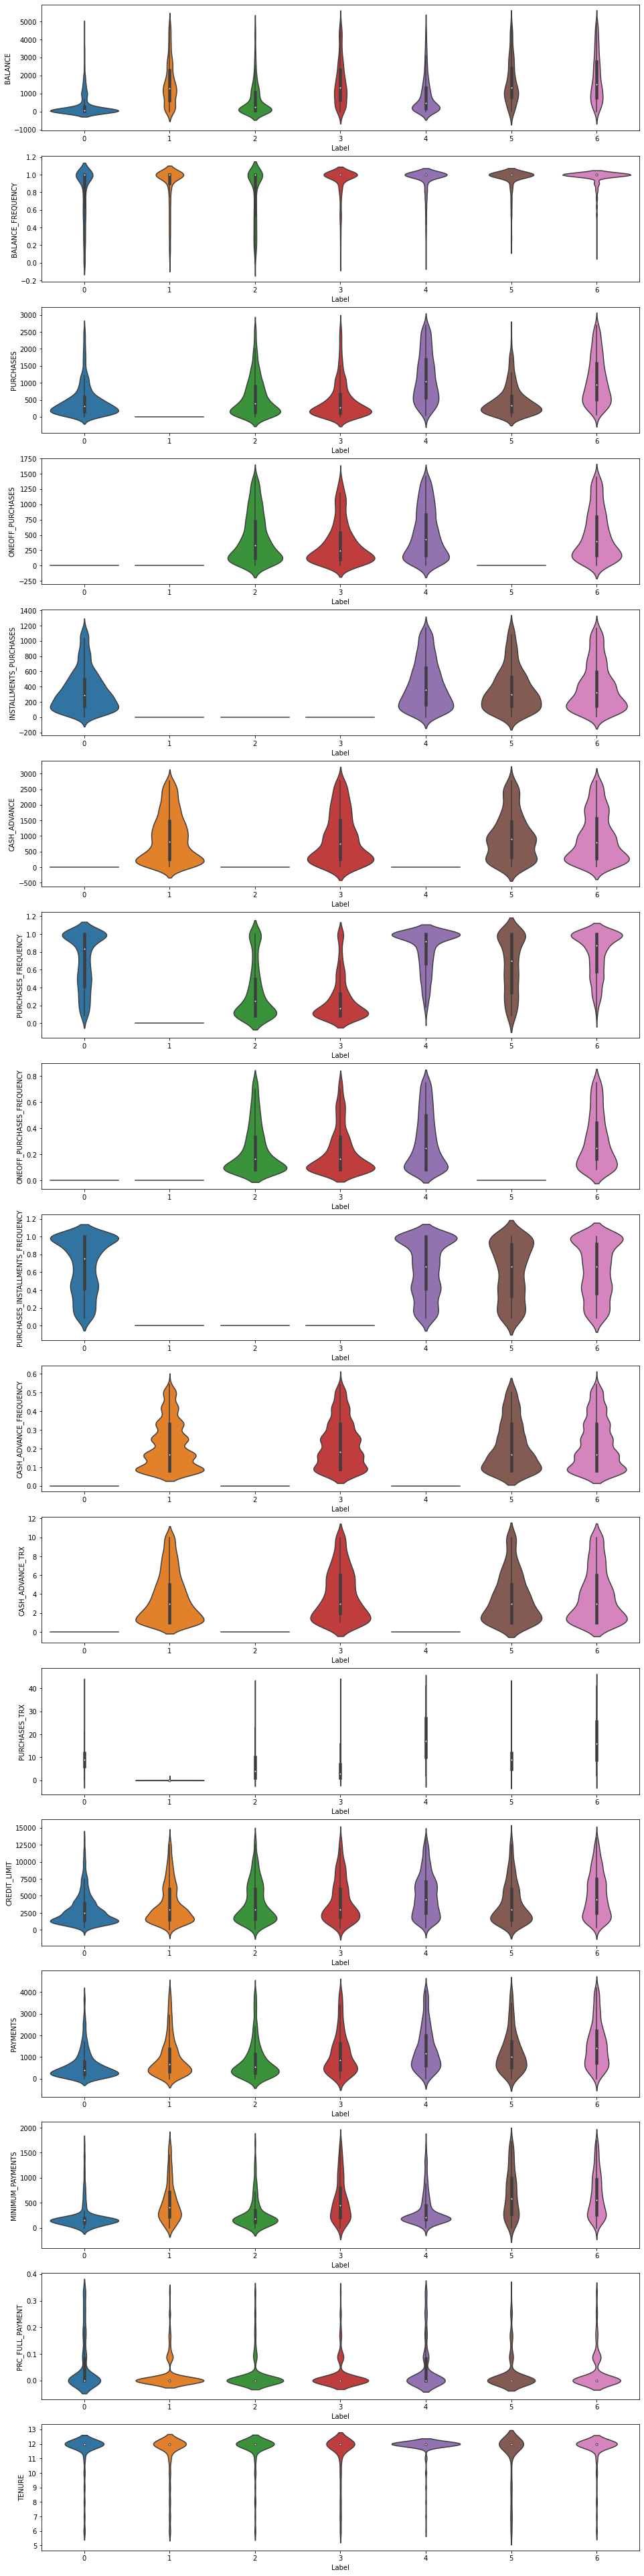

In [62]:
fig, axs = plt.subplots(nrows = 17, ncols = 1, figsize = (16,70))
for i in range(17):
    q1, q3 = np.quantile(final_data.iloc[:,i], [0.25, 0.75])
    sns.violinplot(data = final_data[['Label', final_data.columns[i]]].loc[final_data[final_data.columns[i]] <= (q3 + 1.5*(q3-q1))], x = 'Label', y = final_data.columns[i], ax = axs[i])

plt.show()